# Part II - 2022 NYC's Citi Bike Sharing System Report
## by Sulaiman Handu

## Investigation Overview

> Citi bike service  is the largest bike sharing program in the United States. Exploring the 2022 data, information concerning the comparison between the annual membership subscribers and the casual riders have been studied and insights will be given into the following:
> * The Patronage level of members and casual riders. 
> * Bike preference of members and casual riders. 
> * Average Duration of Rides per hour of the day. 




## Dataset Overview

> Lyft operates New York City’s Citi Bike bicycle sharing service and is committed to supporting bicycling as an alternative transportation option. As part of that commitment, Lyft makes certain Citi Bike system data available to the public. Published downloadable files of the Citi bike trip data are made available [here](https://s3.amazonaws.com/tripdata/index.html).
The scope of study is to analyse 2022 bike sharing data. Files containing data for each of the months in that year have been dowloaded. Data of each month will be merged to form a complete and single dataset for the year 2022. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

##  How has the patronage been over the year ?

> The 2022 data shows that most of the rides were ordered by members with annual subscription. This could be a great turnout for citi bike sharing having known that 78 percent of its annual order came from people with membership subscription. This is also a sign that persons with membership have reasons to keep using the service. Citi bike sharing system have a number bike type within its structure. It will be nice to know the bikes most of its patron are using.

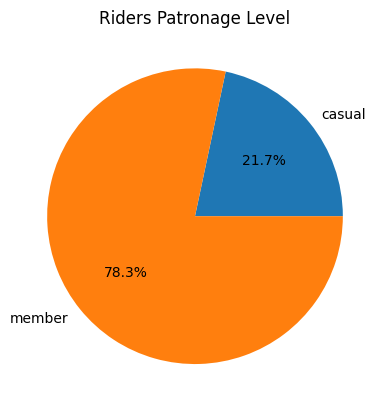

In [11]:
membership = df.member_casual.value_counts()
membership.sort_values(ascending = True).plot(kind = 'pie',autopct='%1.1f%%', title = "Riders Patronage Level")
plt.ylabel("");

## What Type of Bikes do Riders want ?

> Annual Subscribers do not ride the docked bicycle. Only the casual cyclers tried them in the year 2022. Classic bikes were used the most by both parties. The electric bycicle was the second preference. Price information have not been given in this dataset. It will be nice to see if price was an influential factor in the bicycle preference.

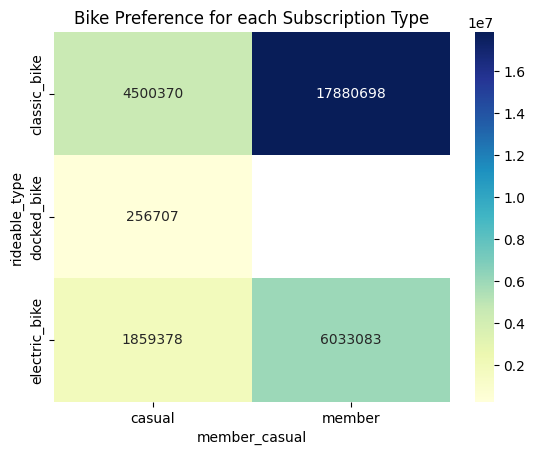

In [19]:
bs_counts = df.groupby(['rideable_type', 'member_casual']).size().reset_index(name='count')
bs_counts = bs_counts.pivot(index = 'rideable_type', columns = 'member_casual', values = 'count')
sb.heatmap(bs_counts, annot = True,fmt= '.0f', cmap = 'YlGnBu')
plt.title('Bike Preference for each Subscription Type');

## Average Duration of Rides per hour of the day. 
> The early morning hours from 5am are the time the cycling activity begins to increase. Many cyclers are going to short distances around this time. Destination will probably be schools or work places. The cyclining duration continues to increase until it peaks around 3pm. Most cyclers at this time are believed to be spending leisure time and not catching up with appointments. Interestingly however, Casual users spend more time cycling than members. This is probably to get the value from their money.



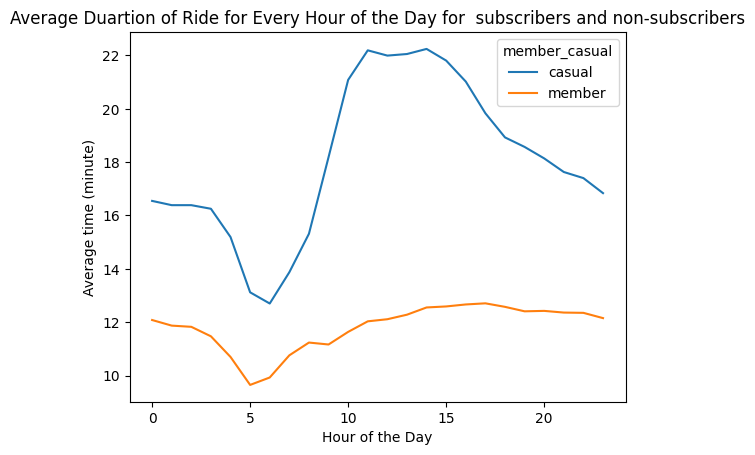

In [26]:
duration_permember = df.groupby(['hr_started','member_casual'])['duration_minute'].mean().reset_index(name = "average_min")
sb.lineplot (data = duration_permember, x = 'hr_started', y = 'average_min', hue = 'member_casual')
plt.title('Average Duartion of Ride for Every Hour of the Day for  subscribers and non-subscribers')
plt.ylabel('Average time (minute)')
plt.xlabel('Hour of the Day');

In [ ]:
# The command below will generate the HTML slideshow. 
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 